***Plotting Accuracy Data from CSV Files***


IndexError: list index out of range

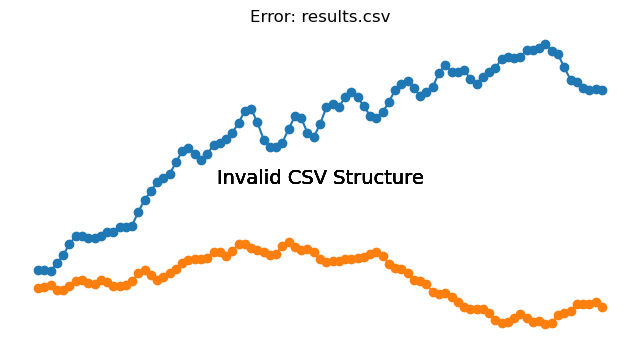

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Base directory to search for CSV files
base_dir = '/home/abdenour/PycharmProjects/SecurityAnalysisFL/outputs/'
ldp_labls = ['7','5','3','0.3', '0.7', '0']
# Output JSON file to store the directory hierarchy
output_json = os.path.join(base_dir, 'csv_file_hierarchy.json')
latex_file_path = os.path.join(base_dir, 'accuracy_plots.tex')

# Dictionary to store the directory hierarchy
directory_hierarchy = {}

# Dictionary to organize CSV files by alpha levels to plot together
alpha_csv_files = {}

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.csv'):
            # Build the full path to the file
            file_path = os.path.join(root, file)

            # Parse the relative path structure
            relative_path = os.path.relpath(file_path, base_dir)
            parts = relative_path.split(os.sep)

            # Insert the file into the directory hierarchy
            current_level = directory_hierarchy
            for part in parts[:-1]:
                if part not in current_level:
                    current_level[part] = {}
                current_level = current_level[part]
            current_level[parts[-1]] = file_path  # Store the full file path at the leaf

            # Extract alpha level and group the file by alpha
            for alpha in ['0.9', '0.3', '0.1']:  # Example-specific values
                if alpha in parts:
                    if alpha not in alpha_csv_files:
                        alpha_csv_files[alpha] = []
                    alpha_csv_files[alpha].append(file_path)

# Save the directory hierarchy into a JSON file
with open(output_json, 'w') as json_file:
    json.dump(directory_hierarchy, json_file, indent=4)

# Generate LaTeX file to include plot figures and text
with open(latex_file_path, 'w') as latex_file:
    # Write the LaTeX document preamble
    latex_file.write(r"""\documentclass{article}
\usepackage{graphicx}
\usepackage{float}
\begin{document}
""")

    # Plot the accuracies from CSV files grouped by alpha levels in subplots
    if alpha_csv_files:
        for alpha, files in sorted(alpha_csv_files.items(), key=lambda x: x[0]):  # Sort by alpha
            fig, ax = plt.subplots(figsize=(8, 4))

            for i, csv_file_path in enumerate(files):
                data = pd.read_csv(csv_file_path)  # Read the CSV into a DataFrame
                if 'Round' in data.columns and 'Accuracy' in data.columns:
                    # Apply smoothing using a rolling average
                    data['Smoothed_Accuracy'] = data['Accuracy'].rolling(window=20, min_periods=10).mean()
                    ax.plot(
                        data['Round'],
                        data['Smoothed_Accuracy'],
                        marker='o',
                        label=f' $\epsilon$={ldp_labls[i]}' if ldp_labls[i] != '0' else 'No LDP',
                    )
                else:
                    ax.text(0.5, 0.5, 'Invalid CSV Structure', fontsize=14, ha='center',
                            transform=ax.transAxes)
                    ax.set_title(f'Error: {os.path.basename(csv_file_path)}')
                    ax.axis('off')

            if alpha == '0.9':
                ax.set_ylabel('Accuracy', fontsize=18)

            ax.set_xlabel('Round', fontsize=18)

            # Add legend only for alpha = 0.1
            if alpha == '0.1':
                ax.legend(fontsize=18)  # Increased legend text size to 16

            ax.grid(True)
            ax.set_ylim(0, 1)

            # Save each alpha plot individually
            individual_plot_path = os.path.join(base_dir,'ldp', f'alpha_{alpha}.pdf')
            plt.tight_layout()
            plt.savefig(individual_plot_path)
            plt.close(fig)

            # Write LaTeX code for including the figure with caption
            latex_file.write(r'\begin{figure}[H]' + '\n')
            latex_file.write(r'\centering' + '\n')
            latex_file.write(f'\\includegraphics[width=\\textwidth]{{{individual_plot_path}}}' + '\n')
            latex_file.write(f'\\caption{{Accuracy plot for alpha level {alpha}. ' +
                             'This plot shows the smoothed accuracy over rounds for each LDP value. ' +
                             'It demonstrates how the privacy budget affects the accuracy of the model.}}' + '\n')
            latex_file.write(r'\end{figure}' + '\n\n')

    else:
        print("No CSV files found to plot.")

    # Write the end of the LaTeX document
    latex_file.write(r"\end{document}")

print("Individual plots saved successfully.")
print(f"Directory hierarchy saved to {output_json}")
print(f"LaTeX file generated at {latex_file_path}")

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Base directory to search for CSV files
base_dir = '/home/abdenour/PycharmProjects/SecurityAnalysisFL/outputs/'

# Output JSON file to store the directory hierarchy
output_json = os.path.join(base_dir, 'csv_file_hierarchy.json')

# Dictionary to store the directory hierarchy
directory_hierarchy = {}

# Dictionary to organize CSV files by alpha levels to plot together
alpha_csv_files = {}

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.csv'):
            # Build the full path to the file
            file_path = os.path.join(root, file)

            # Parse the relative path structure
            relative_path = os.path.relpath(file_path, base_dir)
            parts = relative_path.split(os.sep)

            # Insert the file into the directory hierarchy
            current_level = directory_hierarchy
            for part in parts[:-1]:
                if part not in current_level:
                    current_level[part] = {}
                current_level = current_level[part]
            current_level[parts[-1]] = file_path  # Store the full file path at the leaf

            # Extract alpha level and group the file by alpha
            for alpha in ['0.9', '0.3', '0.1']:  # Example-specific values
                if alpha in parts:
                    if alpha not in alpha_csv_files:
                        alpha_csv_files[alpha] = []
                    alpha_csv_files[alpha].append(file_path)

# Save the directory hierarchy into a JSON file
with open(output_json, 'w') as json_file:
    json.dump(directory_hierarchy, json_file, indent=4)

# Plot the accuracies from CSV files grouped by alpha levels in subplots
if alpha_csv_files:
    fig, axes = plt.subplots(len(alpha_csv_files), 1, figsize=(10, len(alpha_csv_files) * 5))
    if len(alpha_csv_files) == 1:
        axes = [axes]  # Ensure axes is always a list if there's only one subplot

    for i, (alpha, files) in enumerate(sorted(alpha_csv_files.items(), key=lambda x: x[0])):  # Sort by alpha
        for csv_file_path in files:
            data = pd.read_csv(csv_file_path)  # Read the CSV into a DataFrame
            if 'Round' in data.columns and 'Accuracy' in data.columns:
                # Apply smoothing using a rolling average
                data['Smoothed_Accuracy'] = data['Accuracy'].rolling(window=20, min_periods=10).mean()
                axes[i].plot(
                    data['Round'],
                    data['Smoothed_Accuracy'],
                    marker='o',
                    label=f'{os.path.basename(csv_file_path)} (Smoothed)'
                )
            else:
                axes[i].text(0.5, 0.5, 'Invalid CSV Structure', fontsize=12, ha='center')
                axes[i].set_title(f'Error: {os.path.basename(csv_file_path)}')
                axes[i].axis('off')

        axes[i].set_title(f'Accuracy Plot for Alpha: {alpha}')
        axes[i].set_xlabel('Round')
        axes[i].set_ylabel('Accuracy')
        axes[i].legend()
        axes[i].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.savefig(os.path.join(base_dir, "fig" + '.pdf'))
    plt.tight_layout()
    plt.show()

    print("Plots displayed successfully.")
else:
    print("No CSV files found to plot.")

# Print summary
print(f"Directory hierarchy saved to {output_json}")

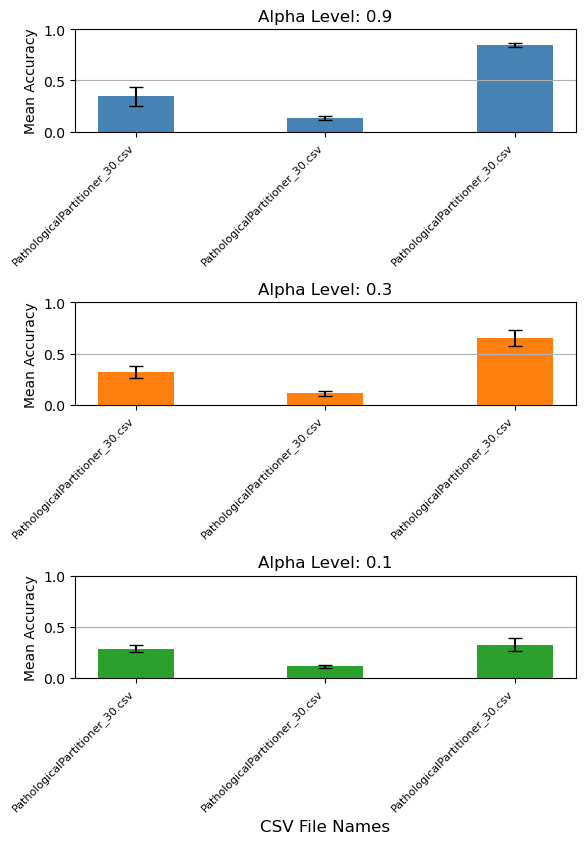

Bar plots displayed successfully.
Directory hierarchy saved to /home/abdenour/PycharmProjects/SecurityAnalysisFL/outputs/csv_file_hierarchy.json


In [62]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Base directory to search for CSV files
base_dir = '/home/abdenour/PycharmProjects/SecurityAnalysisFL/outputs/'

# Output JSON file to store the directory hierarchy
output_json = os.path.join(base_dir, 'csv_file_hierarchy.json')

# Dictionary to store the directory hierarchy
directory_hierarchy = {}

# Dictionary to organize CSV files by alpha and ldp levels to plot together
alpha_ldp_csv_files = {}

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith('.csv'):
            # Build the full path to the file
            file_path = os.path.join(root, file)

            # Parse the relative path structure
            relative_path = os.path.relpath(file_path, base_dir)
            parts = relative_path.split(os.sep)

            # Insert the file into the directory hierarchy
            current_level = directory_hierarchy
            for part in parts[:-1]:
                if part not in current_level:
                    current_level[part] = {}
                current_level = current_level[part]
            current_level[parts[-1]] = file_path  # Store the full file path at the leaf

            # Extract alpha and ldp levels and group the file
            for alpha in ['0.9', '0.3', '0.1']:  # Example-specific values
                if alpha in parts:
                    if alpha not in alpha_ldp_csv_files:
                        alpha_ldp_csv_files[alpha] = []
                    alpha_ldp_csv_files[alpha].append(file_path)

# Save the directory hierarchy into a JSON file
with open(output_json, 'w') as json_file:
    json.dump(directory_hierarchy, json_file, indent=4)

# Plot average accuracies with standard deviations for each alpha using subplots and bar plot
if alpha_ldp_csv_files:
    fig, axs = plt.subplots(3, 1, figsize=(6, 9))  # Subplots for each alpha level
    alphas = ['0.9', '0.3', '0.1']  # Example alpha levels
    bar_width = 0.4  # Width of the bars
    colors = ['#4682b4', '#ff7f0e', '#2ca02c']  # Colors for the bar plots

    for idx, alpha in enumerate(alphas):  # Iterate over alpha levels
        ax = axs[idx]
        files = alpha_ldp_csv_files.get(alpha, [])
        mean_accuracies = []
        std_devs = []

        for csv_file_path in files:
            data = pd.read_csv(csv_file_path)
            if 'Round' in data.columns and 'Accuracy' in data.columns:
                # Smooth data using rolling average
                data['Smoothed_Accuracy'] = data['Accuracy'].rolling(window=5, min_periods=5).mean()
                # Consider only the last 30 rounds
                tail_data = data.tail(30)
                mean_accuracies.append(tail_data['Smoothed_Accuracy'].mean())
                std_devs.append(tail_data['Smoothed_Accuracy'].std())
            else:
                mean_accuracies.append(0)
                std_devs.append(0)

        # Plot the bar chart
        x_positions = np.arange(len(files))
        ax.bar(
            x_positions, mean_accuracies, bar_width,
            color=colors[idx % len(colors)],
            yerr=std_devs, capsize=5,
            label=f'Alpha = {alpha}'
        )
        ax.set_xticks(x_positions)
        ax.set_xticklabels([os.path.basename(f) for f in files], rotation=45, ha='right', fontsize=8)
        ax.set_ylim(0, 1)
        ax.set_ylabel('Mean Accuracy', fontsize=10)
        ax.set_title(f'Alpha Level: {alpha}', fontsize=12)
        ax.grid(True, axis='y')

    # Add legend and adjust layout
    axs[-1].set_xlabel('CSV File Names', fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(os.path.join(base_dir, "accuracy_alpha_subplots_barplot.pdf"))
    plt.show()

    print("Bar plots displayed successfully.")
else:
    print("No CSV files found to plot.")

# Print summary
print(f"Directory hierarchy saved to {output_json}")


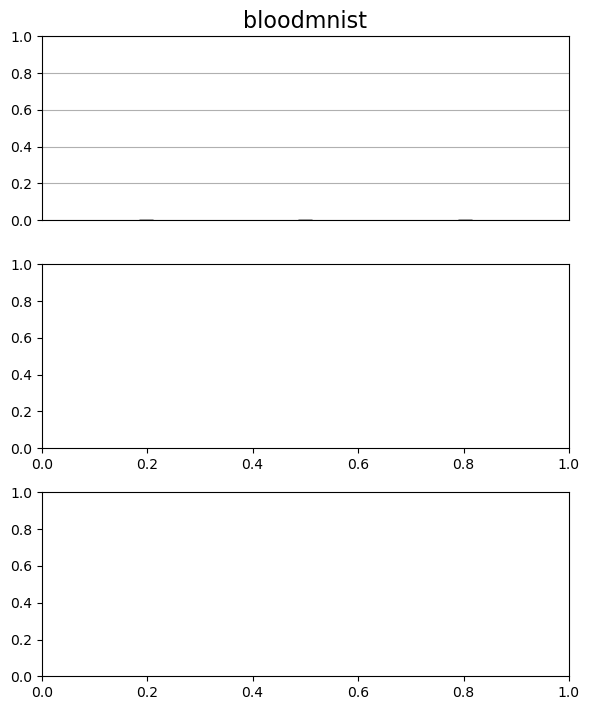

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Heterogeneity colors for plots
heterogeneity_colors = ['#4682b4', '#ff7f0e', '#9467bd']  # Blue, Orange, Purple

# List to store missing or skipped files (optional for debugging)
missing_files = []


# Function to fetch all relevant CSV files
def fetch_csv_files(base_dir):
    csv_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                relative_path = os.path.relpath(file_path, base_dir)
                parts = relative_path.split(os.sep)
                # Validate directory structure: [algorithm]/[model]/[dataset]/[partitioner]/[alpha]/[ldp]/[experiment_date]
                if len(parts) == 8:
                    csv_files.append(file_path)
                else:
                    missing_files.append(file_path)  # Log skipped files for debugging
    return csv_files


# Function to load and filter CSV data
def load_accuracy_data(csv_files, algorithm, model, dataset, partitioner, alpha, ldp):
    # Filter files matching the specific parameters
    matching_files = [
        file for file in csv_files
        if f"{algorithm}/{model}/{dataset}/{partitioner}/{alpha}/{ldp}" in file
    ]

    # Load data from matching files
    combined_data = pd.DataFrame()
    for file in matching_files:
        try:
            data = pd.read_csv(file)
            combined_data = pd.concat([combined_data, data], ignore_index=True)
        except Exception as e:
            print(f"Error loading {file}: {e}")

    return combined_data


# Function to create 3x1 subplots for given parameters
def create_figure(csv_files, figure_title, models, datasets, partitioner_type):
    fig, axs = plt.subplots(3, 1, figsize=(6, 8))  # 3 rows, 1 column for datasets

    for i, dataset in enumerate(datasets):  # Iterate through datasets
        ax = axs[i]
        bar_width = 0.15  # Width of each bar group
        x_positions = np.arange(len(models))  # Positions for models

        for j, alpha in enumerate(['0.9', '0.3', '0.1']):  # Iterate through heterogeneity levels
            mean_accuracies = []
            std_devs = []
            for model in models:
                # Load accuracy data for each model and dataset
                data = load_accuracy_data(
                    csv_files, algorithm='FedAvg', model=model, dataset=dataset,
                    partitioner=partitioner_type, alpha=alpha, ldp='ldp0.1'
                )

                if not data.empty:
                    tail_data = data.tail(30)  # Tail 30 rounds
                    mean_accuracies.append(tail_data['Accuracy'].mean())
                    std_devs.append(tail_data['Accuracy'].std())
                else:
                    mean_accuracies.append(0)
                    std_devs.append(0)

            # Offset positions for each heterogeneity level
            bar_positions = x_positions + j * bar_width
            ax.bar(
                bar_positions, mean_accuracies, bar_width,
                color=heterogeneity_colors[j],
                yerr=std_devs, capsize=5,
                label=r"$\alpha$ = " + f"{alpha.replace('alpha', '')}"
            )

        # Customize axes
        if i == 2:
            ax.set_xticks(x_positions + bar_width * (len(['0.9', '0.3', '0.1']) - 1) / 2)
            ax.set_xticklabels(models, fontsize=16, ha='center')
        else:
            ax.set_xticks([])
            ax.set_xticklabels([])
        ax.set_ylim([0, 1])
        if i == 1:
            ax.set_ylabel('Mean Accuracy (Tail 10 Rounds)', fontsize=18)
        ax.set_title(f"{dataset}", fontsize=16)
        ax.grid(True)

    # Add common legend and labels
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.savefig(os.path.join(base_dir, figure_title + '.pdf'))
    plt.show()


# Main Execution
if __name__ == "__main__":
    # Fetch all CSV files
    all_csv_files = fetch_csv_files(base_dir)

    # Define your models, datasets, and partitioner types
    models = ['mobilnet_v2']
    datasets = ['bloodmnist']

    # Create figures for the Dirichlet partitioner
    create_figure(all_csv_files, 'Dirichlet_Partitioner_Accuracy', models, datasets, 'dirichlet')

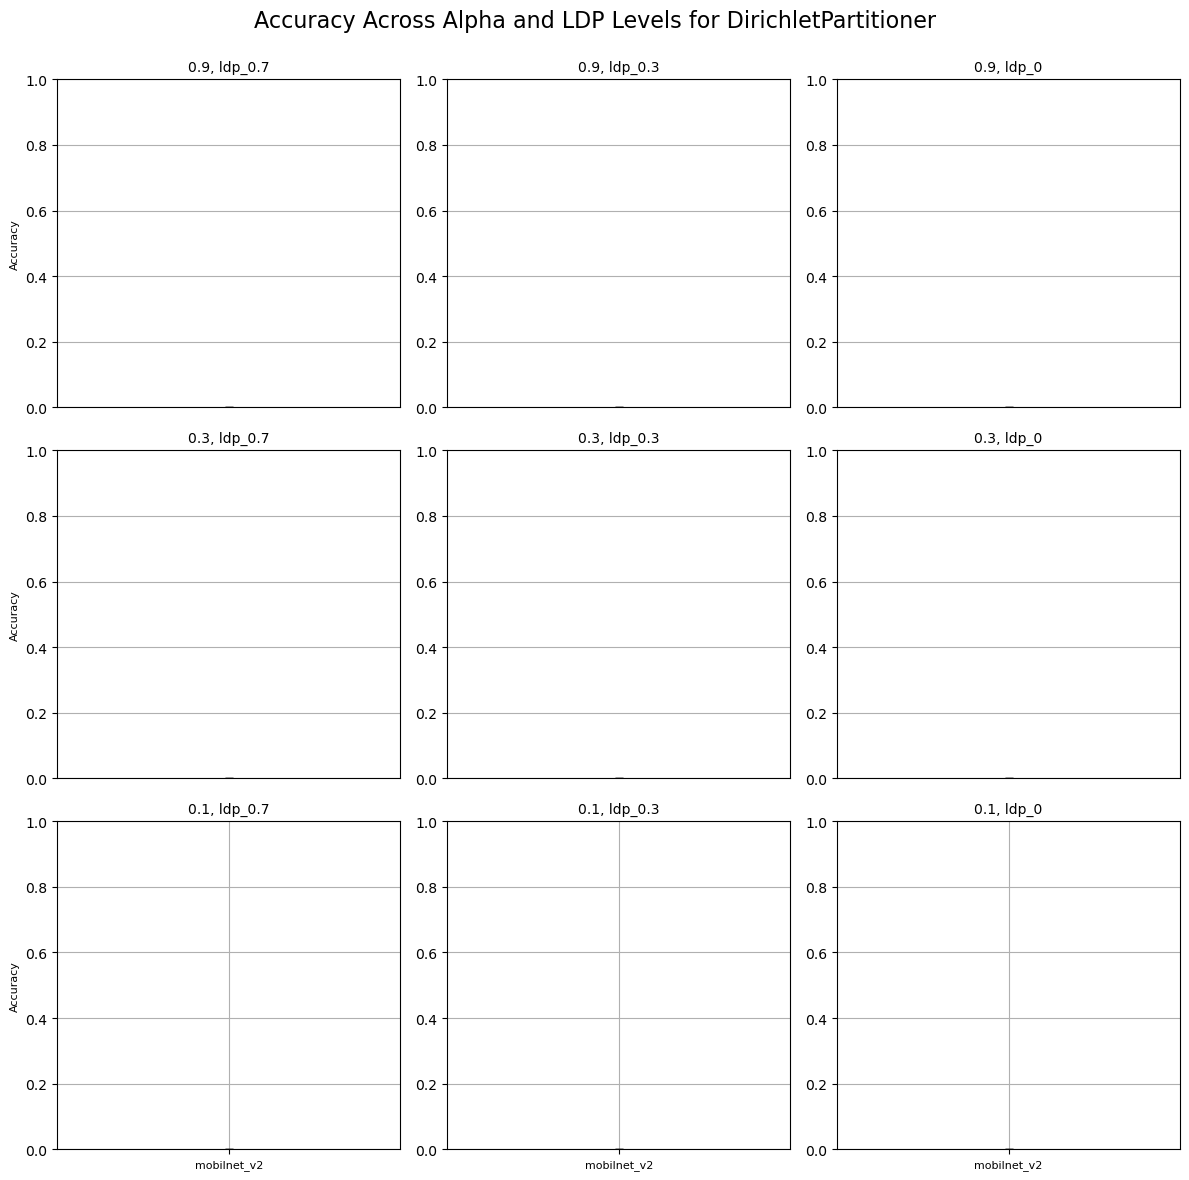

In [53]:
import matplotlib.pyplot as plt
import numpy as np
# Function to create combined plots for alpha and ldp levels
def create_combined_figure(csv_files, figure_title, models, datasets, partitioner_type):
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid for alpha and ldp combinations
    alpha_values = ['0.9', '0.3', '0.1']
    ldp_values = ['ldp_0.7', 'ldp_0.3', 'ldp_0']
    for i, dataset in enumerate(datasets):  # Iterate through datasets
        for j, alpha in enumerate(alpha_values):  # Iterate through alpha levels
            for k, ldp in enumerate(ldp_values):  # Iterate through ldp levels
                ax = axs[j, k]
                bar_width = 0.2  # Width of each bar group
                x_positions = np.arange(len(models))  # Positions for models
                mean_accuracies = []
                std_devs = []
                for model in models:
                    # Load accuracy data for each model, alpha, and ldp
                    data = load_accuracy_data(
                        csv_files, algorithm='FedAvg', model=model, dataset=dataset,
                        partitioner=partitioner_type, alpha=alpha, ldp=ldp
                    )
                    if not data.empty:
                        tail_data = data.tail(30)  # Tail 30 rounds
                        mean_accuracies.append(tail_data['Accuracy'].mean())
                        std_devs.append(tail_data['Accuracy'].std())
                    else:
                        mean_accuracies.append(0)
                        std_devs.append(0)
                ax.bar(
                    x_positions, mean_accuracies, bar_width,
                    color=heterogeneity_colors[j],
                    yerr=std_devs, capsize=3,
                    label=r"$\alpha$=" + f"{alpha}, {ldp}"
                )
                # Customize axes and titles
                ax.set_title(f"{alpha}, {ldp}", fontsize=10)
                ax.set_ylim([0, 1])
                ax.grid(True)
                if j == 2:
                    ax.set_xticks(x_positions)
                    ax.set_xticklabels(models, fontsize=8, ha='center')
                else:
                    ax.set_xticks([])
                if k == 0:
                    ax.set_ylabel('Accuracy', fontsize=8)
    # Add spacing and save the figure
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.suptitle(f"Accuracy Across Alpha and LDP Levels for {partitioner_type}", fontsize=16)
    plt.savefig(os.path.join(base_dir, figure_title + '.pdf'))
    plt.show()

# Main Execution
if __name__ == "__main__":
    create_combined_figure(all_csv_files, 'Alpha_LDP_Accuracy', models, datasets, 'DirichletPartitioner')

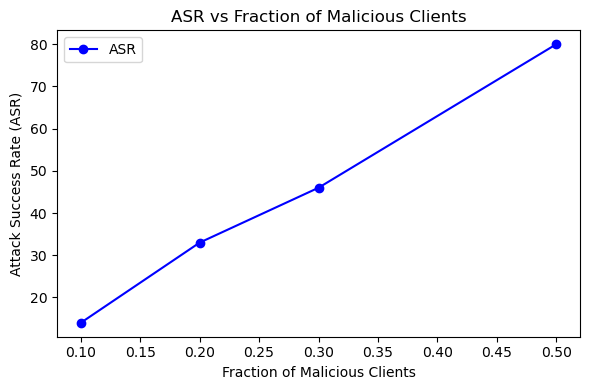

In [4]:
import matplotlib.pyplot as plt

# Given x-axis values (fraction of malicious clients)
fractions = [0.1, 0.2, 0.3, 0.5]

# Corresponding ASR values (modify these as needed)
asr_values = [14, 33, 46, 80]  # Example values

# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(fractions, asr_values, marker='o', linestyle='-', color='b', label='ASR')

# Labels and title
plt.xlabel('Fraction of Malicious Clients')
plt.ylabel('Attack Success Rate (ASR)')
#plt.title('ASR vs Fraction of Malicious Clients')
# plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('asr_vs_malicious_clients.pdf')

# Show the plot
plt.show()

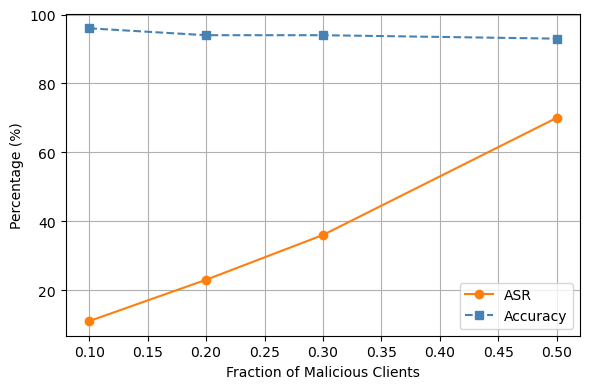

In [1]:
import matplotlib.pyplot as plt

# Given x-axis values (fraction of malicious clients)
fractions = [0.1, 0.2, 0.3, 0.5]

# Corresponding ASR values (modify these as needed)
asr_values = [11, 23, 36, 70]  # Example values

# Corresponding Accuracy values (modify these as needed)
accuracy_values = [96, 94, 94, 93]  # Example values
colors = ['#4682b4', '#ff7f0e', '#2ca02c']
# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(fractions, asr_values, marker='o', linestyle='-', color='#ff7f0e', label='ASR')
plt.plot(fractions, accuracy_values, marker='s', linestyle='--', color='#4682b4', label='Accuracy')

# Labels and title
plt.xlabel('Fraction of Malicious Clients')
plt.ylabel('Percentage (%)')
#plt.title('ASR and Accuracy vs Fraction of Malicious Clients')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('asr_accuracy_vs_malicious_clients.pdf')

# Show the plot
plt.show()


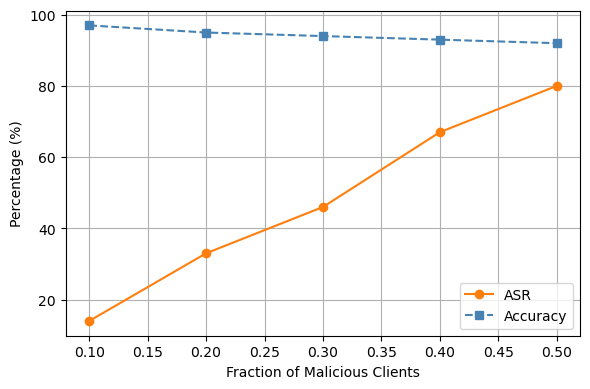

In [25]:
import matplotlib.pyplot as plt

# Given x-axis values (fraction of malicious clients)
fractions = [0.1, 0.2, 0.3, 0.4, 0.5]

# Corresponding ASR values (modify these as needed)
asr_values = [14, 33, 46, 67, 80]  # Example values

# Corresponding Accuracy values (modify these as needed)
accuracy_values = [97, 95, 94, 93, 92]  # Example values
colors = ['#4682b4', '#ff7f0e', '#2ca02c']
# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(fractions, asr_values, marker='o', linestyle='-', color='#ff7f0e', label='ASR')
plt.plot(fractions, accuracy_values, marker='s', linestyle='--', color='#4682b4', label='Accuracy')

# Labels and title
plt.xlabel('Fraction of Malicious Clients')
plt.ylabel('Percentage (%)')
#plt.title('ASR and Accuracy vs Fraction of Malicious Clients')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('asr_accuracy_vs_malicious_clients.pdf')

# Show the plot
plt.show()


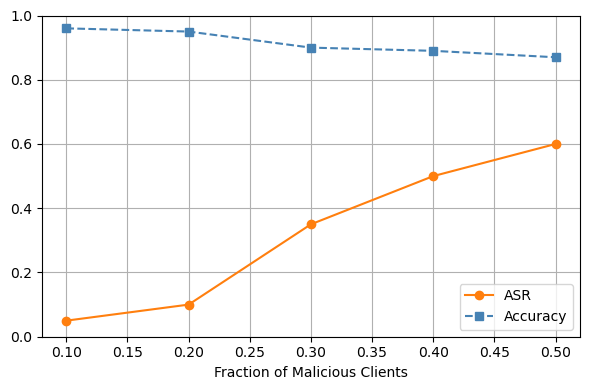

In [4]:
import matplotlib.pyplot as plt

# Given x-axis values (fraction of malicious clients)
fractions = [0.1, 0.2, 0.3, 0.4, 0.5]

# Corresponding ASR values (modify these as needed)
asr_values = [5, 10, 35, 50, 60]  # Example values

# Corresponding Accuracy values (modify these as needed)
accuracy_values = [96, 95, 90, 89, 87]  # Example values
colors = ['#4682b4', '#ff7f0e', '#2ca02c']
# Plotting the data
# Normalize the values to the range [0,1]
asr_values = [x / 100 for x in asr_values]
accuracy_values = [x / 100 for x in accuracy_values]

plt.figure(figsize=(6, 4))
plt.plot(fractions, asr_values, marker='o', linestyle='-', color='#ff7f0e', label='ASR')
plt.plot(fractions, accuracy_values, marker='s', linestyle='--', color='#4682b4', label='Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
# Labels and title
plt.xlabel('Fraction of Malicious Clients')
#plt.ylabel('Percentage (%)')
#plt.title('ASR and Accuracy vs Fraction of Malicious Clients')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('asr_accuracy_vs_malicious_clients_dri_0.9.pdf')

# Show the plot
plt.show()


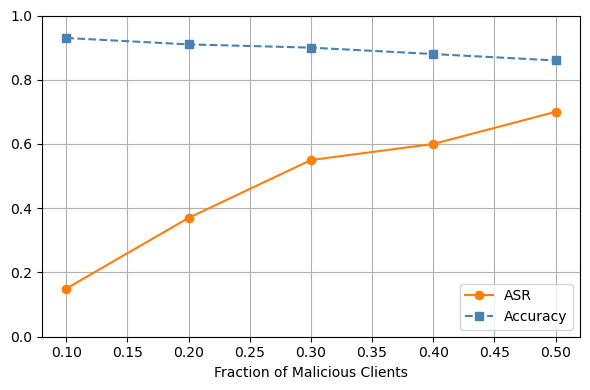

In [5]:
import matplotlib.pyplot as plt

# Given x-axis values (fraction of malicious clients)
fractions = [0.1, 0.2, 0.3, 0.4, 0.5]

# Corresponding ASR values (modify these as needed)
asr_values = [15, 37, 55, 60, 70]  # Example values

# Corresponding Accuracy values (modify these as needed)
accuracy_values = [93, 91, 90, 88, 86]  # Example values
colors = ['#4682b4', '#ff7f0e', '#2ca02c']

# Normalize the values to the range [0,1]
asr_values = [x / 100 for x in asr_values]
accuracy_values = [x / 100 for x in accuracy_values]
# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(fractions, asr_values, marker='o', linestyle='-', color='#ff7f0e', label='ASR')
plt.plot(fractions, accuracy_values, marker='s', linestyle='--', color='#4682b4', label='Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
# Labels and title
plt.xlabel('Fraction of Malicious Clients')
#plt.ylabel('Percentage (%)')
#plt.title('ASR and Accuracy vs Fraction of Malicious Clients')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('asr_accuracy_vs_malicious_clients_dri_0.3.pdf')


# Show the plot
plt.show()

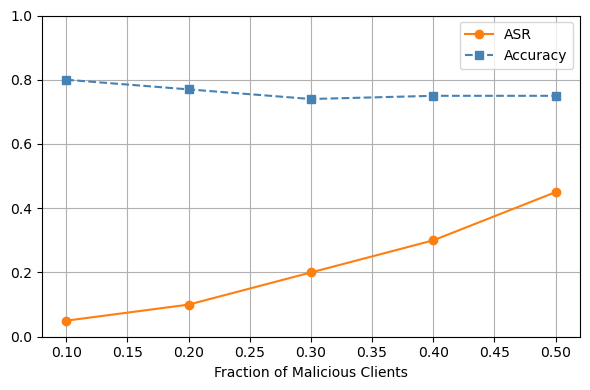

In [6]:
import matplotlib.pyplot as plt

# Given x-axis values (fraction of malicious clients)
fractions = [0.1, 0.2, 0.3, 0.4, 0.5]

# Corresponding ASR values (modify these as needed)
asr_values = [5, 10, 20, 30, 45]  # Example values

# Corresponding Accuracy values (modify these as needed)
accuracy_values = [80, 77, 74, 75, 75]  # Example values

# Normalize the values to the range [0,1]
asr_values = [x / 100 for x in asr_values]
accuracy_values = [x / 100 for x in accuracy_values]

# Plotting the data
plt.figure(figsize=(6, 4))
plt.plot(fractions, asr_values, marker='o', linestyle='-', color='#ff7f0e', label='ASR')
plt.plot(fractions, accuracy_values, marker='s', linestyle='--', color='#4682b4', label='Accuracy')

# Labels and title
plt.xlabel('Fraction of Malicious Clients')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('asr_accuracy_vs_malicious_clients_dri_0.1.pdf')
plt.show()
